# Imports 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from pycaret.regression import *

# Config

In [2]:
# matplotlib config
plt.style.use("ggplot")
mpl.rcParams["figure.figsize"] = (10, 8)

DIR_DATA = "../data/"
DIR_MODELS = "../pickled-models/"

# Load & Preprocess Data

In [3]:
df = pd.read_csv(DIR_DATA + "kc_house_data.csv")
display(df.head(20))
df.info()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
# Convert date col to datetime type
df["date"] = pd.to_datetime(df["date"].apply(lambda x: x[:8]))

# Calculate transaction age as # of days between the transaction date and the
# the date of the most recent transaction in the dataset
df["trx_age"] = (df.date.max() - df.date).apply(lambda x: x.days)

In [5]:
# Check if ints are actually binanries or have multiple unique values
df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
trx_age            372
dtype: int64

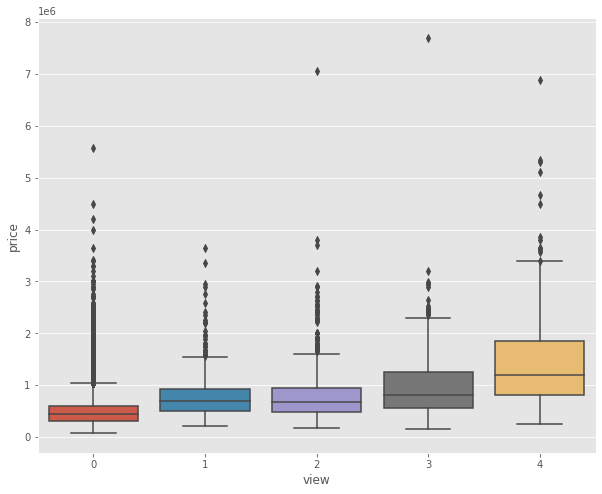

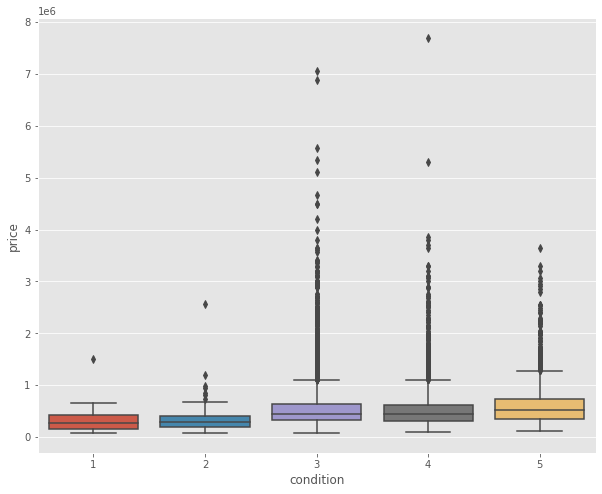

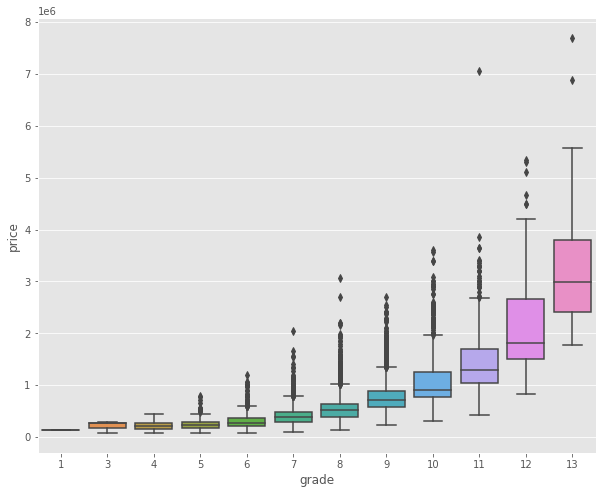

In [6]:
# Checking if view, condition, and grade are nominal or at least ordinal
# if they are at least ordinal, then we should see a monotonic relationship
# with price. We can see a monotonic relationship, so at least ordinal...
for col in ['view', 'condition', 'grade']:
    sns.boxplot(data=df, x=col, y="price")
    plt.show()

In [7]:
# In this exercise we will not go through an EDA or do any data quality checks
# or any feature engineering aside from the calculation of transaction age
# which is for the purpose of facilitating the analysis

# Define X and y cols, excluding address features for simplicity
X_cols = [col for col in df.columns if col not in [
    "price", 
    "date", 
    "id", 
    "zipcode", 
    "lat", 
    "long"
]]

y_col = ["price"]

X, y = df[X_cols], df[y_col]

# Selecting Models

In [8]:
# Setting-up pycaret to evaluate model performance
reg_exp = setup(data=df[y_col + X_cols], target='price', 
                session_id=1, numeric_features=X_cols)

,Description,Value
0,session_id,1
1,Target,price
2,Original Data,"(21613, 17)"
3,Missing Values,False
4,Numeric Features,16
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(15129, 16)"


In [9]:
# Top model is catboost
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,113312.1436,30046503676.3601,172815.2615,0.7603,0.2807,0.2368,4.7280
lightgbm,Light Gradient Boosting Machine,116447.7861,32468037086.2719,179772.4561,0.7406,0.2856,0.2428,0.0930
xgboost,Extreme Gradient Boosting,117274.8984,32594972262.4000,180319.1047,0.7383,0.2882,0.2418,0.9130
et,Extra Trees Regressor,115631.9912,33014892200.9627,181304.9334,0.7364,0.2863,0.2397,1.5510
rf,Random Forest Regressor,115842.5998,33024611342.0380,181311.5698,0.7363,0.2848,0.2393,2.6680
gbr,Gradient Boosting Regressor,121364.9738,33964190661.3668,183969.2711,0.7286,0.2958,0.2551,0.7770
lar,Least Angle Regression,137582.1315,43781130944.4309,208632.8150,0.6520,0.3706,0.2893,0.0180
br,Bayesian Ridge,137585.8809,43783585654.7299,208637.7051,0.6520,0.3705,0.2893,0.0230
ridge,Ridge Regression,137583.9266,43781278924.8000,208632.7859,0.6520,0.3706,0.2893,0.0210
lasso,Lasso Regression,137582.1922,43781141913.6000,208632.8328,0.6520,0.3706,0.2893,0.0530


In [10]:
# Initializing CatBoost model
cboost = create_model("catboost")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,114960.2037,34137905565.8672,184764.4597,0.7047,0.2880,0.2429
1,108274.8699,24876600626.0981,157723.1772,0.7925,0.2738,0.2333
2,117030.3561,30289672376.4233,174039.2840,0.7488,0.2872,0.2449
3,117303.6090,36077824655.0313,189941.6349,0.7591,0.2769,0.2346
4,107573.7063,23849587434.1678,154433.1164,0.7665,0.2742,0.2283
5,114971.0295,27883239970.6812,166982.7535,0.7518,0.2889,0.2458
6,107932.6483,23512562560.5972,153338.0662,0.7801,0.2772,0.2327
7,114570.2515,36358847174.5013,190679.9601,0.7469,0.2803,0.2331
8,114503.3332,32913055203.5881,181419.5557,0.7551,0.2798,0.2356
9,116001.4288,30565741196.6453,174830.6072,0.7970,0.2808,0.2370


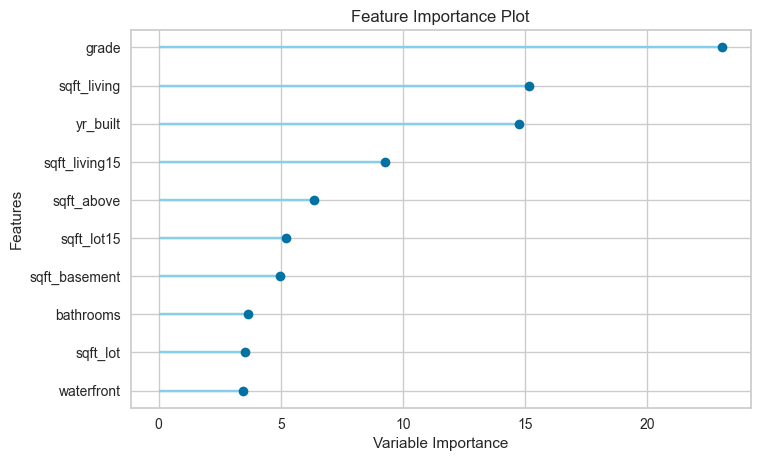

In [11]:
plot_model(cboost, plot="feature")

In [12]:
predict_model(cboost)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,113188.9125,36974196060.5201,192286.7548,0.7631,0.2742,0.2281


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,trx_age,price,Label
0,4.0,2.75,2790.0,6600.0,2.0,0.0,0.0,3.0,9.0,2790.0,0.0,2000.0,0.0,2900.0,6752.0,230.0,459000.0,6.303354e+05
1,3.0,2.25,1630.0,6449.0,1.0,0.0,0.0,3.0,7.0,1310.0,320.0,1986.0,0.0,1620.0,7429.0,56.0,445000.0,3.399097e+05
2,2.0,1.50,2370.0,184231.0,2.0,0.0,0.0,3.0,11.0,2370.0,0.0,2005.0,0.0,3860.0,151081.0,281.0,1057000.0,9.121302e+05
3,4.0,2.50,2270.0,7665.0,2.0,0.0,0.0,3.0,9.0,2270.0,0.0,1986.0,0.0,2450.0,8706.0,203.0,732350.0,5.413293e+05
4,3.0,1.00,1430.0,7599.0,1.5,0.0,0.0,4.0,6.0,1010.0,420.0,1930.0,0.0,1290.0,10320.0,56.0,235000.0,2.974745e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6479,4.0,2.50,3002.0,6042.0,2.0,0.0,0.0,3.0,8.0,3002.0,0.0,2004.0,0.0,2566.0,6390.0,329.0,394500.0,5.151171e+05
6480,3.0,1.50,1240.0,9500.0,1.0,0.0,0.0,4.0,7.0,1240.0,0.0,1955.0,0.0,1845.0,10125.0,196.0,259950.0,3.778756e+05
6481,2.0,1.00,1280.0,4635.0,1.0,0.0,0.0,3.0,6.0,840.0,440.0,1917.0,0.0,1660.0,6180.0,37.0,230000.0,4.040059e+05
6482,5.0,3.50,5170.0,7197.0,3.0,1.0,4.0,3.0,11.0,3520.0,1650.0,1998.0,0.0,3020.0,12880.0,238.0,1680000.0,2.780819e+06


In [13]:
# The linear regression model is to be compared to CatBoost
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,137663.7812,39041712128.0000,197589.7500,0.6623,0.3712,0.2944
1,133107.4844,39802970112.0000,199506.8125,0.6680,0.3699,0.2861
2,140832.8594,44231839744.0000,210313.6719,0.6332,0.3851,0.3010
3,140527.3281,53989535744.0000,232356.4844,0.6395,0.3584,0.2825
4,135171.0938,36649402368.0000,191440.3438,0.6411,0.3551,0.2868
5,138002.5781,40094273536.0000,200235.5469,0.6432,0.3864,0.2946
6,129513.4219,34012817408.0000,184425.6406,0.6819,0.3800,0.2832
7,140723.4219,52704886784.0000,229575.4531,0.6332,0.3812,0.2916
8,135176.8438,45593272320.0000,213525.8125,0.6607,0.3545,0.2785
9,145093.7500,51690315776.0000,227355.0469,0.6566,0.3678,0.2946


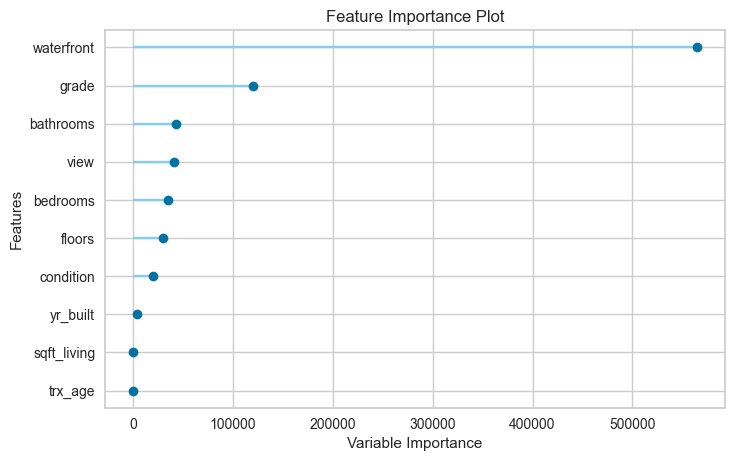

In [14]:
plot_model(lr, plot="feature")

In [15]:
# Predictions are done on the 30% hold-out set
predict_model(lr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,140719.7500,53781794816.0000,231909.0156,0.6554,0.3636,0.2855


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,trx_age,price,Label
0,4.0,2.75,2790.0,6600.0,2.0,0.0,0.0,3.0,9.0,2790.0,0.0,2000.0,0.0,2900.0,6752.0,230.0,459000.0,725058.5
1,3.0,2.25,1630.0,6449.0,1.0,0.0,0.0,3.0,7.0,1310.0,320.0,1986.0,0.0,1620.0,7429.0,56.0,445000.0,325637.5
2,2.0,1.50,2370.0,184231.0,2.0,0.0,0.0,3.0,11.0,2370.0,0.0,2005.0,0.0,3860.0,151081.0,281.0,1057000.0,841506.5
3,4.0,2.50,2270.0,7665.0,2.0,0.0,0.0,3.0,9.0,2270.0,0.0,1986.0,0.0,2450.0,8706.0,203.0,732350.0,674094.5
4,3.0,1.00,1430.0,7599.0,1.5,0.0,0.0,4.0,6.0,1010.0,420.0,1930.0,0.0,1290.0,10320.0,56.0,235000.0,343578.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6479,4.0,2.50,3002.0,6042.0,2.0,0.0,0.0,3.0,8.0,3002.0,0.0,2004.0,0.0,2566.0,6390.0,329.0,394500.0,596663.0
6480,3.0,1.50,1240.0,9500.0,1.0,0.0,0.0,4.0,7.0,1240.0,0.0,1955.0,0.0,1845.0,10125.0,196.0,259950.0,351797.0
6481,2.0,1.00,1280.0,4635.0,1.0,0.0,0.0,3.0,6.0,840.0,440.0,1917.0,0.0,1660.0,6180.0,37.0,230000.0,379165.5
6482,5.0,3.50,5170.0,7197.0,3.0,1.0,4.0,3.0,11.0,3520.0,1650.0,1998.0,0.0,3020.0,12880.0,238.0,1680000.0,2102150.5


In [16]:
# Monotone cols are area cols, view, grade, and condition
# as they increase they should lead to a higher price
monotone_cols = [col for col in X.columns if "sqft" in col] + \
    ["view", "grade", "condition"]
monotone_constraints = [1 if col in monotone_cols else 0 
                              for col in X.columns]

cboost_constrained = tune_model(cboost, custom_grid={
    "monotone_constraints": [monotone_constraints]}, n_iter=1)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,121568.2580,39258108194.2146,198136.5897,0.6604,0.2999,0.2547
1,115551.8637,28148027182.0818,167773.7381,0.7652,0.2855,0.2456
2,121147.8264,32323053285.0857,179786.1321,0.7320,0.2991,0.2542
3,122375.1538,37768379929.3314,194340.8859,0.7478,0.2856,0.2441
4,115590.5517,28006323963.0835,167350.9007,0.7258,0.2864,0.2410
5,121370.2483,32014179031.3825,178925.0654,0.7151,0.3007,0.2573
6,114816.7318,27298496376.8870,165222.5662,0.7447,0.2887,0.2460
7,123557.7740,43278158004.5728,208034.0309,0.6988,0.2974,0.2508
8,119218.5482,33308184612.3014,182505.3002,0.7522,0.2888,0.2448
9,122978.4786,34916980438.9317,186860.8585,0.7681,0.2958,0.2504


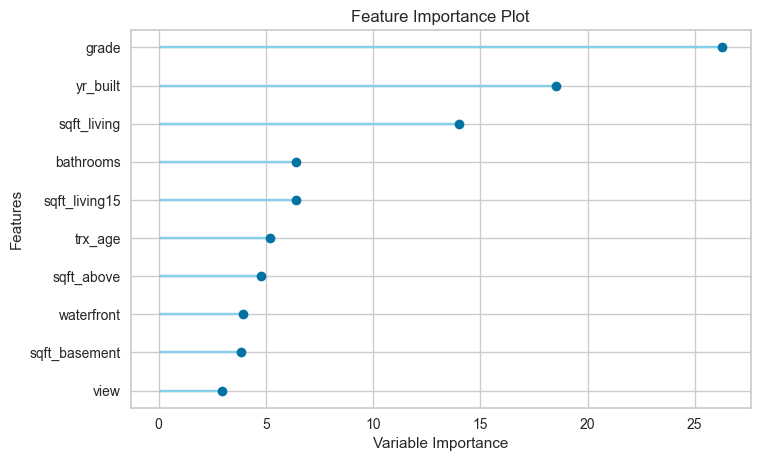

In [17]:
plot_model(cboost_constrained, plot="feature")

In [18]:
predict_model(cboost_constrained)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,121368.9888,40286269386.0397,200714.3976,0.7419,0.2893,0.2440


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,trx_age,price,Label
0,4.0,2.75,2790.0,6600.0,2.0,0.0,0.0,3.0,9.0,2790.0,0.0,2000.0,0.0,2900.0,6752.0,230.0,459000.0,6.578751e+05
1,3.0,2.25,1630.0,6449.0,1.0,0.0,0.0,3.0,7.0,1310.0,320.0,1986.0,0.0,1620.0,7429.0,56.0,445000.0,3.401225e+05
2,2.0,1.50,2370.0,184231.0,2.0,0.0,0.0,3.0,11.0,2370.0,0.0,2005.0,0.0,3860.0,151081.0,281.0,1057000.0,1.010715e+06
3,4.0,2.50,2270.0,7665.0,2.0,0.0,0.0,3.0,9.0,2270.0,0.0,1986.0,0.0,2450.0,8706.0,203.0,732350.0,5.429542e+05
4,3.0,1.00,1430.0,7599.0,1.5,0.0,0.0,4.0,6.0,1010.0,420.0,1930.0,0.0,1290.0,10320.0,56.0,235000.0,3.654602e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6479,4.0,2.50,3002.0,6042.0,2.0,0.0,0.0,3.0,8.0,3002.0,0.0,2004.0,0.0,2566.0,6390.0,329.0,394500.0,5.191320e+05
6480,3.0,1.50,1240.0,9500.0,1.0,0.0,0.0,4.0,7.0,1240.0,0.0,1955.0,0.0,1845.0,10125.0,196.0,259950.0,3.580308e+05
6481,2.0,1.00,1280.0,4635.0,1.0,0.0,0.0,3.0,6.0,840.0,440.0,1917.0,0.0,1660.0,6180.0,37.0,230000.0,4.113736e+05
6482,5.0,3.50,5170.0,7197.0,3.0,1.0,4.0,3.0,11.0,3520.0,1650.0,1998.0,0.0,3020.0,12880.0,238.0,1680000.0,2.575909e+06


In [19]:
lr_pos = create_model("lasso")
lr_pos = tune_model(lr_pos, custom_grid={"positive": [True], 
                                         "alpha": [0],
                                        }, n_iter=1)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,149347.8906,45041864704.0000,212230.6875,0.6104,0.4053,0.3231
1,149131.7656,47011823616.0000,216822.0938,0.6079,0.4084,0.3222
2,149960.2656,48483049472.0000,220188.6719,0.5980,0.4638,0.3219
3,151517.9844,60266455040.0000,245492.2656,0.5976,0.4076,0.3120
4,150231.2812,42902904832.0000,207130.1562,0.5799,0.4121,0.3244
5,152204.4844,47019638784.0000,216840.1250,0.5815,0.4191,0.3343
6,141497.9688,40257208320.0000,200641.9844,0.6235,0.4215,0.3140
7,151808.7969,59175260160.0000,243259.6562,0.5881,0.4021,0.3158
8,147465.3125,52158046208.0000,228381.3594,0.6119,0.4291,0.3092
9,157604.7344,57413480448.0000,239611.1094,0.6186,0.4133,0.3236


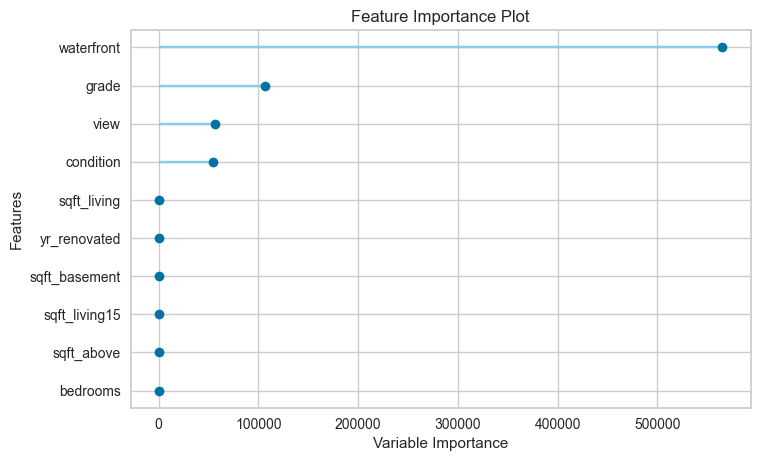

In [20]:
plot_model(lr_pos, plot="feature")

In [21]:
predict_model(lr_pos)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,152837.2344,61290430464.0000,247569.0469,0.6073,0.4172,0.3128


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,trx_age,price,Label
0,4.0,2.75,2790.0,6600.0,2.0,0.0,0.0,3.0,9.0,2790.0,0.0,2000.0,0.0,2900.0,6752.0,230.0,459000.0,7.359599e+05
1,3.0,2.25,1630.0,6449.0,1.0,0.0,0.0,3.0,7.0,1310.0,320.0,1986.0,0.0,1620.0,7429.0,56.0,445000.0,3.554548e+05
2,2.0,1.50,2370.0,184231.0,2.0,0.0,0.0,3.0,11.0,2370.0,0.0,2005.0,0.0,3860.0,151081.0,281.0,1057000.0,9.034622e+05
3,4.0,2.50,2270.0,7665.0,2.0,0.0,0.0,3.0,9.0,2270.0,0.0,1986.0,0.0,2450.0,8706.0,203.0,732350.0,6.580451e+05
4,3.0,1.00,1430.0,7599.0,1.5,0.0,0.0,4.0,6.0,1010.0,420.0,1930.0,0.0,1290.0,10320.0,56.0,235000.0,2.747646e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6479,4.0,2.50,3002.0,6042.0,2.0,0.0,0.0,3.0,8.0,3002.0,0.0,2004.0,0.0,2566.0,6390.0,329.0,394500.0,6.545009e+05
6480,3.0,1.50,1240.0,9500.0,1.0,0.0,0.0,4.0,7.0,1240.0,0.0,1955.0,0.0,1845.0,10125.0,196.0,259950.0,3.501356e+05
6481,2.0,1.00,1280.0,4635.0,1.0,0.0,0.0,3.0,6.0,840.0,440.0,1917.0,0.0,1660.0,6180.0,37.0,230000.0,2.051473e+05
6482,5.0,3.50,5170.0,7197.0,3.0,1.0,4.0,3.0,11.0,3520.0,1650.0,1998.0,0.0,3020.0,12880.0,238.0,1680000.0,2.115626e+06


In [22]:
# Retrain-model on all data including hold-out set
lr = finalize_model(lr)
cboost = finalize_model(cboost)
cboost_constrained = finalize_model(cboost_constrained)
lr_pos = finalize_model(lr_pos)

In [23]:
models = {"lr": lr,
          "cboost": cboost, 
          "cboost_constrained": cboost_constrained, 
          "lr_pos": lr_pos, 
         }

for model_name, model in models.items():
    save_model(model, DIR_MODELS +  model_name)

Transformation Pipeline and Model Succesfully Saved
Transformation Pipeline and Model Succesfully Saved
Transformation Pipeline and Model Succesfully Saved
Transformation Pipeline and Model Succesfully Saved


In [24]:
# Load pickled pipelines
lr = load_model(DIR_MODELS + "lr")
cboost = load_model(DIR_MODELS + "cboost")
cboost_constrained = load_model(DIR_MODELS + "cboost_constrained")
lr_pos = load_model(DIR_MODELS + "lr_pos")

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded


In [25]:
# New set-up for more optimized non-negative linear regression model
reg_exp = setup(data=df[y_col + X_cols], 
                target='price', 
                session_id=1, 
                numeric_features=X_cols,
                bin_numeric_features=['trx_age', 'yr_built', 'yr_renovated'],
                feature_interaction=True,
                interaction_threshold=0.5,
                polynomial_features=True,
                polynomial_degree=2,
                polynomial_threshold=0.5,
                remove_multicollinearity=True,
                feature_selection=True,
                feature_selection_threshold=0.5,
                normalize=True,
                normalize_method="minmax",
               )

,Description,Value
0,session_id,1
1,Target,price
2,Original Data,"(21613, 17)"
3,Missing Values,False
4,Numeric Features,16
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(15129, 1662)"


In [26]:
lr_opt = create_model("lasso")
lr_opt = tune_model(lr_opt, custom_grid={
    "positive": [True], 
    "alpha": [0]
}, n_iter=1)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,129347.3984,37047955456.0000,192478.4531,0.6796,0.3242,0.2782
1,125674.7266,33230280704.0000,182291.7500,0.7229,0.3176,0.2703
2,130656.5078,37287264256.0000,193099.1094,0.6908,0.3274,0.2762
3,130939.7031,39922204672.0000,199805.4219,0.7334,0.3150,0.2684
4,130170.5859,38972096512.0000,197413.5156,0.6184,0.3155,0.2674
5,131769.8281,40122322944.0000,200305.5781,0.6429,0.3257,0.2802
6,124339.7109,30454177792.0000,174511.2500,0.7151,0.3155,0.2682
7,132246.2969,50947780608.0000,225716.1562,0.6454,0.3184,0.2710
8,127056.3047,37538398208.0000,193748.2812,0.7207,0.3095,0.2616
9,135209.9531,41637244928.0000,204052.0625,0.7234,0.3272,0.2790


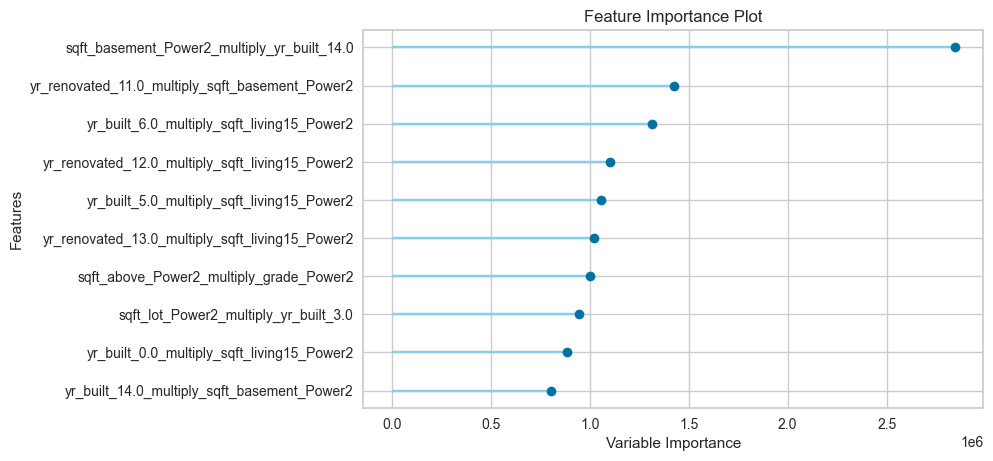

In [27]:
plot_model(lr_opt, plot="feature")

In [28]:
predict_model(lr_opt)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,128895.4219,40118120448.0000,200295.0781,0.7429,0.3169,0.2661


,trx_age_8.0,trx_age_7.0,yr_renovated_11.0,bathrooms_Power2,yr_built_12.0,sqft_basement_Power2,yr_renovated_14.0,yr_renovated_13.0,sqft_lot15,yr_renovated_9.0,...,yr_renovated_9.0_multiply_sqft_lot15,yr_built_9.0_multiply_sqft_living_Power2,sqft_lot15_Power2_multiply_sqft_living_Power2,yr_built_1.0_multiply_trx_age_7.0,sqft_basement_Power2_multiply_grade_Power2,bedrooms_multiply_trx_age_2.0,trx_age_3.0_multiply_yr_built_8.0,sqft_lot_multiply_condition,price,Label
0,1.0,0.0,0.0,0.165981,0.0,0.000000,0.0,0.0,0.006999,0.0,...,0.0,0.000000,4.898578e-06,0.0,0.000000,0.000000,0.0,0.001841,459000.0,6.814904e+05
1,0.0,0.0,0.0,0.111111,0.0,0.004408,0.0,0.0,0.007777,0.0,...,0.0,0.000000,1.953537e-06,0.0,0.001102,0.090909,0.0,0.001796,445000.0,3.243389e+05
2,0.0,0.0,0.0,0.049383,0.0,0.000000,0.0,0.0,0.172791,0.0,...,0.0,0.000000,1.773712e-03,0.0,0.000000,0.000000,0.0,0.055642,1057000.0,8.897666e+05
3,0.0,1.0,0.0,0.137174,0.0,0.000000,0.0,0.0,0.009244,0.0,...,0.0,0.000000,5.359636e-06,0.0,0.000000,0.000000,0.0,0.002164,732350.0,5.716798e+05
4,0.0,0.0,0.0,0.021948,0.0,0.007593,0.0,0.0,0.011098,0.0,...,0.0,0.000000,2.862454e-06,0.0,0.001281,0.090909,0.0,0.003216,235000.0,4.381768e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6479,0.0,0.0,0.0,0.137174,0.0,0.000000,0.0,0.0,0.006583,0.0,...,0.0,0.000000,5.086863e-06,0.0,0.000000,0.000000,0.0,0.001672,394500.0,5.410730e+05
6480,0.0,1.0,0.0,0.049383,0.0,0.000000,0.0,0.0,0.010874,0.0,...,0.0,0.000000,2.019508e-06,0.0,0.000000,0.000000,0.0,0.004080,259950.0,3.880568e+05
6481,0.0,0.0,0.0,0.021948,0.0,0.008333,0.0,0.0,0.006342,0.0,...,0.0,0.000000,8.010261e-07,0.0,0.001406,0.000000,0.0,0.001246,230000.0,2.001009e+05
6482,0.0,0.0,0.0,0.268861,1.0,0.117185,0.0,0.0,0.014038,0.0,...,0.0,0.000000,6.246081e-05,0.0,0.082030,0.000000,0.0,0.002022,1680000.0,2.596554e+06


In [29]:
lr_opt = finalize_model(lr_opt)

In [30]:
models = {"lr_opt": lr_opt}

for model_name, model in models.items():
    save_model(model, DIR_MODELS +  model_name)

Transformation Pipeline and Model Succesfully Saved


In [31]:
lr_opt = load_model(DIR_MODELS + "lr_opt")

Transformation Pipeline and Model Successfully Loaded


In [32]:
# Include all models from both regression set-ups
models = {"lr": lr,
          "cboost": cboost, 
          "cboost_constrained": cboost_constrained, 
          "lr_pos": lr_pos, 
          "lr_opt": lr_opt
         }

# Sanity Checks 

In [33]:
def sanity_check_sum(model, dataframe, cols, delta=1):
    '''Calculates success rate on basic sanity check. A "delta" value is added
    to columns in a dataframe and the newly predicted house price should be higher
    than the existing prediction since the addition is supposed to be an added feature
    to the house such as bigger area or better condition or view etc.

    Args:
        model: sklearn or other model with predict() method
        dataframe: pandas dataframe with dataset to be test
        cols: column or list of columns in dataframe to be incremented by delta parameter
        delta (optional): Value added to columns before predicting price on updated dataframe.
            Defaults to 1.

    Returns:
        % of observations where all sanity checks are passed 
    '''
    if isinstance(cols, str):
        cols = [cols]

    test_results = []

    for col in cols:
        dataframe_pre = dataframe.copy(deep=True)
        dataframe_post = dataframe.copy(deep=True)
        
        dataframe_post[col] = dataframe_pre[col] + delta

        test_results.append(model.predict(dataframe_post) >=
                            model.predict(dataframe_pre))

    # Check if test is passed on every column (AND logic)
    test_results = np.min(test_results, axis=0)

    return round(np.mean(test_results), 4)

In [34]:
def sanity_check_sum_control(model, dataframe, cols, control_col, delta=1):
    '''Calculates success rate on a sanity check. A "delta" value is added to
    columns in a dataframe conditioning on the control column. The control column is
    set to the max possible value in the dataframe as well as min, then we get the newly 
    predicted house prices after adding the "delta" value to the passed columns. The assumption
    is that the increase in house price when the control column is set to max should be larger
    than the increase in house price when the control column is set to min. An example is
    1 additional sqft for a high grade house should be worth more than 1 extra sqft for a low
    grade house if all else is kept constant.

    Args:
        model: sklearn or other model with predict() method
        dataframe: pandas dataframe with dataset to be test
        cols: column or list of columns in dataframe to be incremented by delta parameter
        control_col: single control column which is conditioned to min and max
        delta (optional): Value added to columns before predicting price on updated dataframe.
            Defaults to 1.

    Returns:
        % of observations where all sanity checks are passed 
    '''
    if isinstance(cols, str):
        cols = [cols]

    # Max/min values of the control variable in the dataframe
    control_max, control_min = dataframe[control_col].max(), dataframe[control_col].min()

    test_results = []

    for col in cols:
        dataframe_pre = dataframe.copy(deep=True)
        dataframe_post = dataframe.copy(deep=True)
        
        dataframe_post[col] = dataframe_pre[col] + delta
        
        # Calculate impact of adding delta when control col is set to max
        dataframe_pre[control_col] = control_max
        dataframe_post[control_col] = control_max
        max_diff = model.predict(dataframe_post) - model.predict(dataframe_pre)
        
        # Calculate impact of adding delta when control col is set to min
        dataframe_pre[control_col] = control_min
        dataframe_post[control_col] = control_min
        min_diff = model.predict(dataframe_post) - model.predict(dataframe_pre)
        
        # Slack is provided for floats that are multiplied by large coefficients
        test_results.append(max_diff - min_diff >= -10)

    # Check if test is passed on every column (AND logic)
    test_results = np.min(test_results, axis=0)

    return round(np.mean(test_results), 4)

In [35]:
for model_name, model in models.items():
    result = sanity_check_sum(model=model, 
                              dataframe=X, delta=100,
                              cols=monotone_cols
                             )
    print(f"{model_name}: {result * 100}% sucess on sanity check")

lr: 0.0% sucess on sanity check
cboost: 13.28% sucess on sanity check
cboost_constrained: 100.0% sucess on sanity check
lr_pos: 100.0% sucess on sanity check
lr_opt: 100.0% sucess on sanity check


In [38]:
area_cols = [col for col in X.columns if "sqft" in col]

for model_name, model in models.items():
    result = sanity_check_sum_control(
        model=model, 
        dataframe=X, delta=100,
        cols=area_cols,
        control_col="grade"
    )
    print(f"{model_name}: {result * 100}% sucess on sanity check")

lr: 100.0% sucess on sanity check
cboost: 11.85% sucess on sanity check
cboost_constrained: 16.34% sucess on sanity check
lr_pos: 100.0% sucess on sanity check
lr_opt: 100.0% sucess on sanity check
